# <font color=red>Tutorial 5 - Data Visualization</font>

## Matplotlib

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

### Classes & Hierarchy

Everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib "state-machine environment" which is provided by the `matplotlib.pyplot` module. At this level, simple functions are used to add plot elements to the current axes in the current figure.<br>

Now let's get fimiliar with the main classes of matplotlib: Figure, Axes and Axis. For more information refer to <a href='https://matplotlib.org'>matplotlib documentation</a>.

#### Figure

Kind of a container of all other classes. The figure keeps track of all the child Axes, and some 'special' artists (titles, legends, etc). 

#### Axes

This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled using the set_xlim() and set_ylim() Axes methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

#### Axis

These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks).

### Getting started

Let's try to create a plot of sine and cosine functions in the range of $[0, 2\pi]$ on a single axes:

To start, we'll have to import Numpy and Matplotlib's Pyplot modules, as all of plotting functions in matplotlib expect Numpy arrays type as input.
In addition, we will set the Matplotlib palette to 'Viridis', which is more color blind friendly

In [1]:
from matplotlib import pyplot as plt
import matplotlib.style as style
style.use('tableau-colorblind10')

import numpy as np

First, let's define our X and Y values:

In [2]:
x = np.linspace(0, 2*np.pi, 100) # create a linear space of 100 samples on the range of [0, 2*PI]
y1 = np.sin(x)
y2 = np.cos(x)

Now we will use the Pyplot subplots() method to generate a figure and axes objects, and then configure them using the `pyplot` module:

Text(0, 0.5, 'Y')

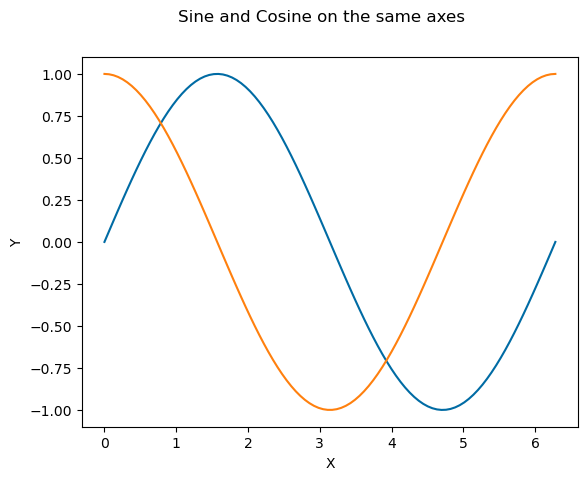

In [3]:
fig, ax = plt.subplots()
ax.plot(x,y1, label='sin')
ax.plot(x,y2, label='cos')
fig.suptitle('Sine and Cosine on the same axes')
plt.xlabel('X')
plt.ylabel('Y') # , rotation='horizontal') # There are many parameters - we should explore the documantation to find what we seek
# plt.legend(); 
# plt.show() # needed in Python, but not when using Jupyter notebook

Here's an example of using two axes:

Text(0.5, 0, 'X')

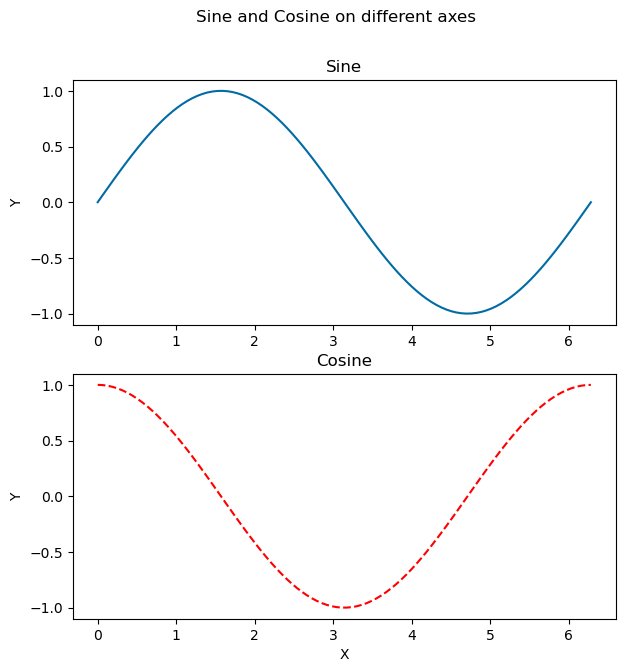

In [4]:
fig, axs = plt.subplots(2, 1)  # subplots(num_of_rows, num_of_columns)
fig.suptitle('Sine and Cosine on different axes')
fig.set_size_inches(7, 7)
axs[0].plot(x, y1, label='sin')
axs[1].plot(x, y2, label='cos', color='red', linestyle='--')
axs[0].set_title('Sine')
axs[1].set_title('Cosine')
axs[0].set_ylabel('Y') # , rotation='horizontal')
axs[1].set_ylabel('Y') # , rotation='horizontal')
axs[1].set_xlabel('X')

### Pandas & Matplotlib Integration

Pandas has tight integration with matplotlib. We can plot data directly from a DataFrame using the `plot()` method:

In [5]:
import pandas as pd

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

In [6]:
df.head()

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2


Create side by side plots of the number of children of each person, and the number of pets of each person. Use the `ax` parameter of the `df.plot()` method to specify in which axes to plot

<Axes: xlabel='name'>

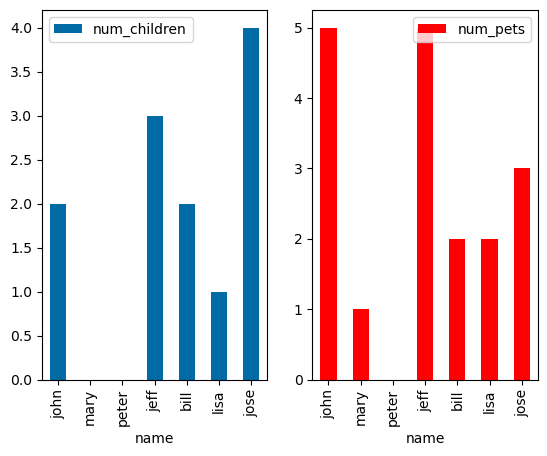

In [7]:
fig, axs = plt.subplots(1,2)
df.plot(kind='bar', x='name', y='num_children', ax=axs[0])
df.plot(kind='bar', x='name', y='num_pets', color='red', ax=axs[1])

(0.0, 6.0)

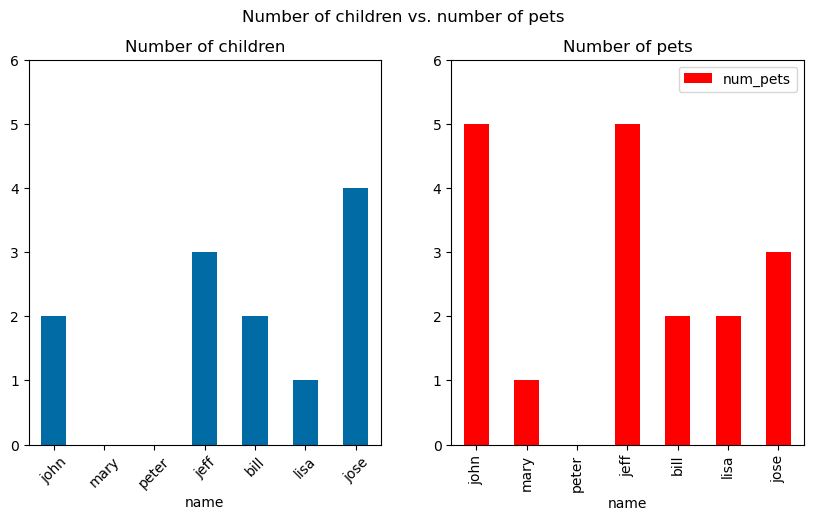

In [8]:
# example of how to manipulate the plot using the Figure and Axes objects

fig, axs = plt.subplots(1,2)
df.plot(kind='bar', x='name', y='num_children', ax=axs[0])
df.plot(kind='bar', x='name', y='num_pets', color='red', ax=axs[1])

fig.set_size_inches(10 ,5)
fig.suptitle('Number of children vs. number of pets')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45);
axs[0].get_legend().set_visible(False)
axs[0].set_title('Number of children')
axs[1].set_title('Number of pets')

axs[0].set_ylim(0, 6)
axs[1].set_ylim(0, 6)

We can also plot it on a single axes:

Text(0.5, 0.98, 'Example of side-by-side bars in single axes')

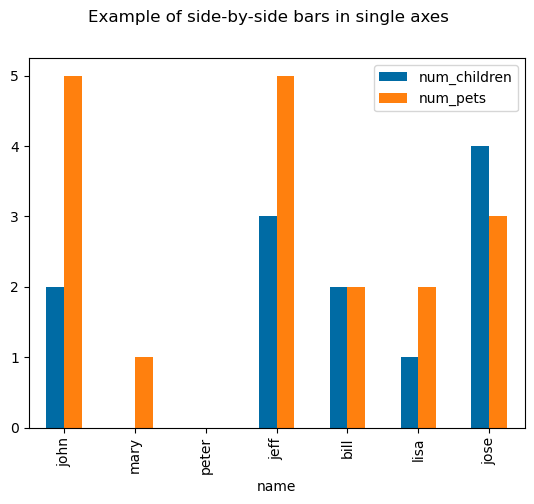

In [9]:
fig, axs = plt.subplots()
df.plot(kind='bar', x='name', y=['num_children', 'num_pets'], ax = axs)
fig.suptitle('Example of side-by-side bars in single axes')

## Seaborn

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.<br>
The minimal necessary arguments for seaborn visualization are the dataset (data) and the axis (x, y).<br>
We will focus on three main aspects using seaborn and provide simple examples of each one:
1. Distribution visualization (histogram) using `displot()`
2. Visualizing statistical relationships using `relpolt()`
3. Plotting with categorical data using `catplot()`

All methods return a `FacetGrid` object which is a multi-plot grid.

We will use the 'tips' dataset that is part of the seaborn module. We will load the dataset using the 'load_dataset()' method: 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("viridis")

tips = sns.load_dataset("tips") # load one of the example datasets
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Distribution visualization (histogram)

`displot()` is a new method in Seaborn, which is available in newer versions. To be able to use the new method we might need to upgrade Seaborn using the following `pip` command:

`pip install seaborn --upgrade`

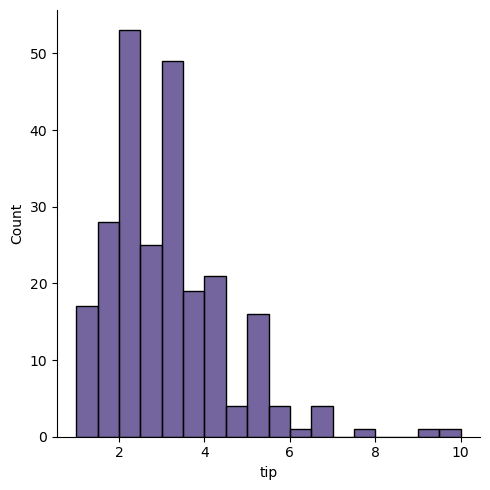

In [11]:
sns.displot(data=tips, x='tip')

### Visualizing statistical relationships

We will use the `relplot()` method to visualize statistical relationships. We can use two kinds of plots using the `relplot()` method:
* scatterplot (the default) - visualizes statistical relationships of two variables using a cloud of points
* lineplot - more common when we want to understand changes of a variable as a function of time

#### Scatterplot (default)

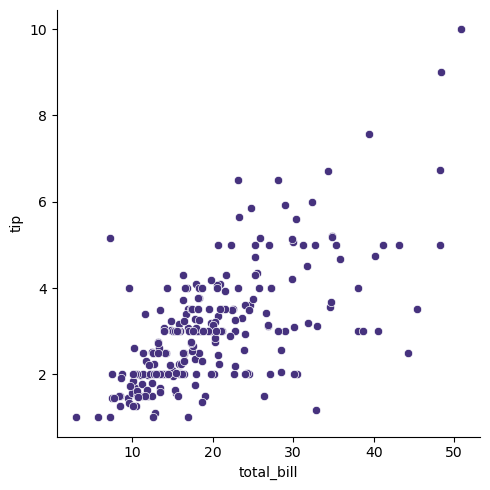

In [12]:
facetgrid_obj = sns.relplot(x="total_bill", y="tip", data=tips); # plot relation between bills and tips
facetgrid_obj

There are many other arguments that provide visual control of the data, here are some examples:
- hue - color difference (usually in case there is a column with categorical variable and we want to see the difference the result in each category)
- col - seperate by columns by drawing a faceted (categorical variables, there is also option for row)
- size - differnt size of markers
- style - different marker style

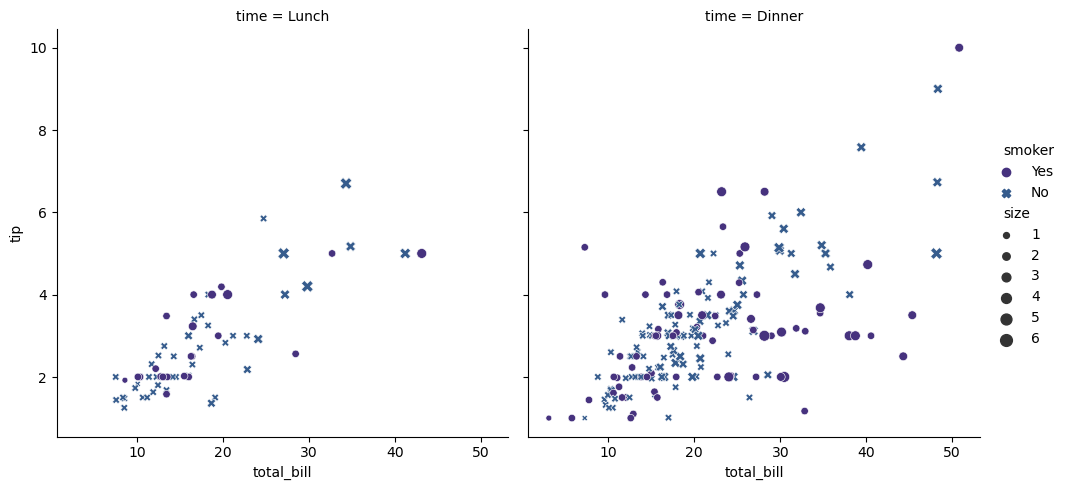

In [13]:
# draw a scatter plot with multiple parameters
facetgrid_obj = sns.relplot(data = tips, x="total_bill", y="tip", col="time" ,hue="smoker", style="smoker", size="size");
facetgrid_obj

#### Lineplots

Let's generate a random signal and use seaborn to visualize the signal over time:

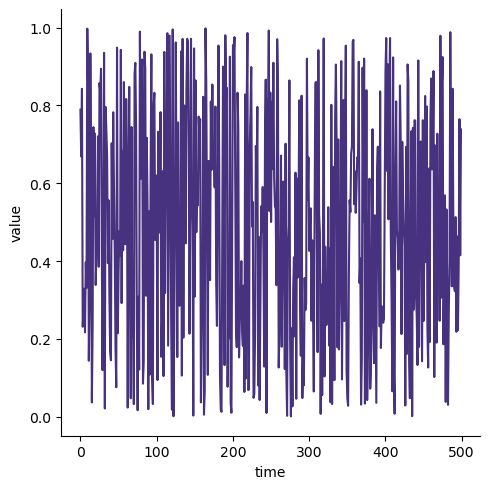

In [14]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.rand(500)))
sns.relplot(x="time", y="value", kind="line", data=df)

### Plotting with categorical data

In seaborn, there are several different ways to visualize a relationship involving categorical data. The `catplot()` method gives higher-level access to some categorical visual presentations that can be selected using the 'kind' parameter. They are:

* Categorical scatter plots
* Categorical distribution plots
* Categorical estimate plots

We will explore some key presentations of each type, but not all of them. For more information regarding all the other representations refer to the seaborn documentation.

#### Categorical scatter plot

The default representation of the data in catplot() uses a scatterplot (kind='strip'):

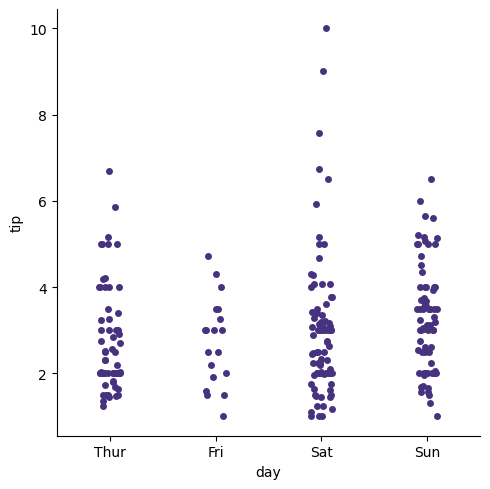

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
facetgrid_obj = sns.catplot(x="day", y="tip", data=tips); # the default kind for catplot is kind='strip'
facetgrid_obj

#### Categorical distribution plot - Boxplot

The boxplot shows the three quartile values of the distribution along with extreme values.

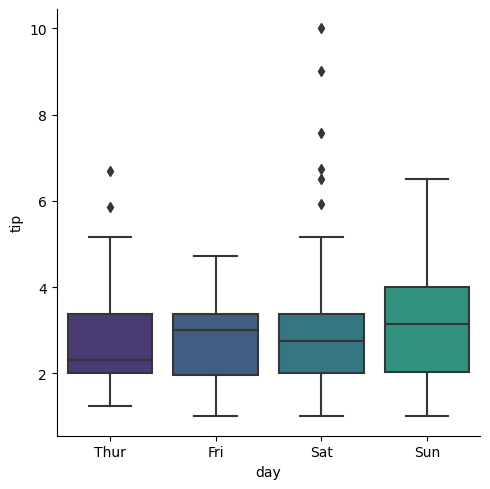

In [16]:
sns.catplot(x="day", y="tip", kind="box", data=tips);

#### Categorical estimate plots

For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. We can use the 'barplot' and the 'countplot' types for that. 

##### Bar plots

The 'barplot' operates on a full dataset and applies a function to obtain the estimate.

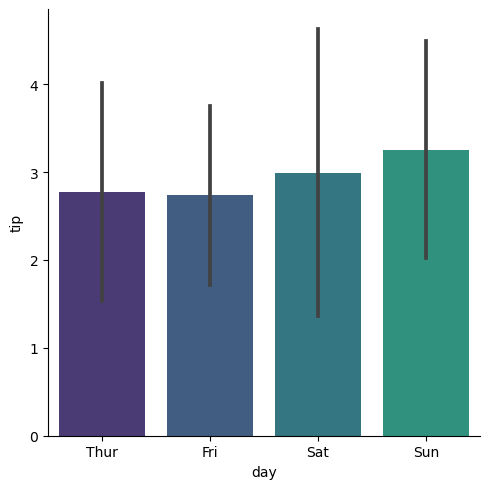

In [17]:
sns.catplot(x="day", y="tip", kind="bar", data=tips, errorbar='sd');

##### Count plots

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so using kind='count' in catplot:

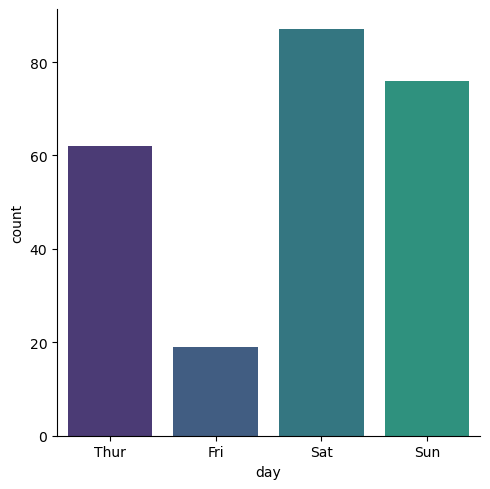

In [18]:
sns.catplot(x="day", kind="count", data=tips);

### Access Figure and Axes objects in FacetGrid object

Text(0.5, 28.999999999999986, 'Total Bills')

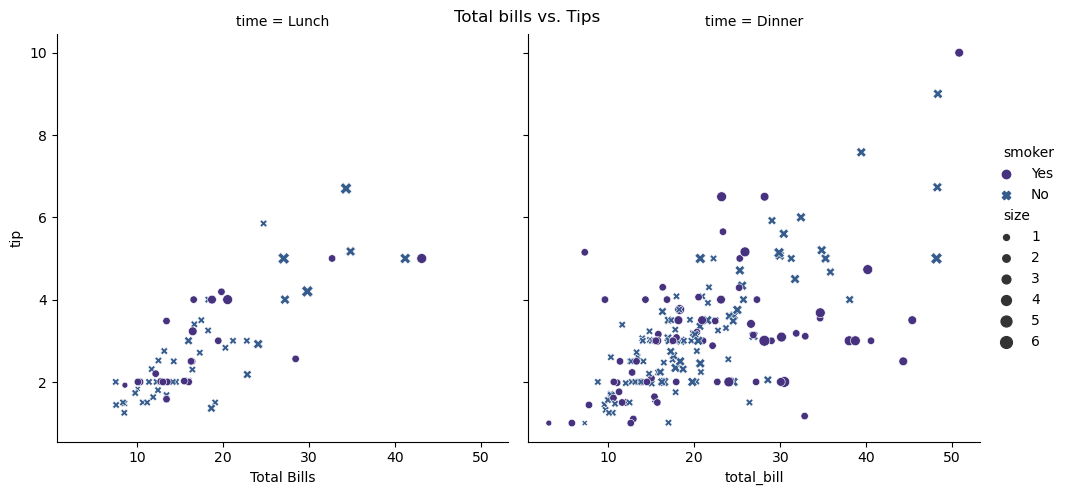

In [19]:
facetgrid_obj = sns.relplot(data = tips, x="total_bill", y="tip", col="time" ,hue="smoker", style="smoker", size="size");
facetgrid_obj.fig.suptitle('Total bills vs. Tips')
facetgrid_obj.axes[0, 0].set_xlabel('Total Bills')

## <font color=blue> **Exercise** </font>

1. Create a linear space of 100 samples ranging from 0 to 10. Plot a single axes presenting ${x^2}$ vs ${1.5^x}$ (use Numpy's `power()` method). Provide a title and labels for the axis.
2. Use the 'Tips' dataset and present the total bill for each table size, separated by the time of the dinner. Provide title and horizontal axis labels.
3. Based on the 'Tips' dataset, determine whether the upper quartile (75%) tip in lunch is larger than median tip in dinner (you are expected to do this using plots).
4. Is it true to say that as the size of the table increases, the average tip also increases?

In [20]:
# Write your code here


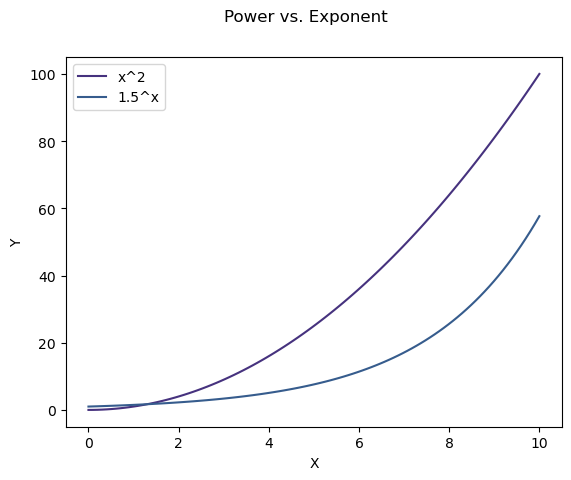

In [21]:
# Solution 1
x = np.linspace(0, 10, 100) # create a linear space of 100 samples on the range of [0, 2*PI]
y1 = np.power(x, 2)
y2 = np.power(1.5, x)

fig, ax = plt.subplots()
ax.plot(x,y1, label='x^2')
ax.plot(x,y2, label='1.5^x')
fig.suptitle('Power vs. Exponent')
plt.xlabel('X')
plt.ylabel('Y') # , rotation='horizontal') # There are many parameters - we should explore the documantation to find what we seek
plt.legend()

Text(0.5, 0.98, 'Total bills vs. Table size')

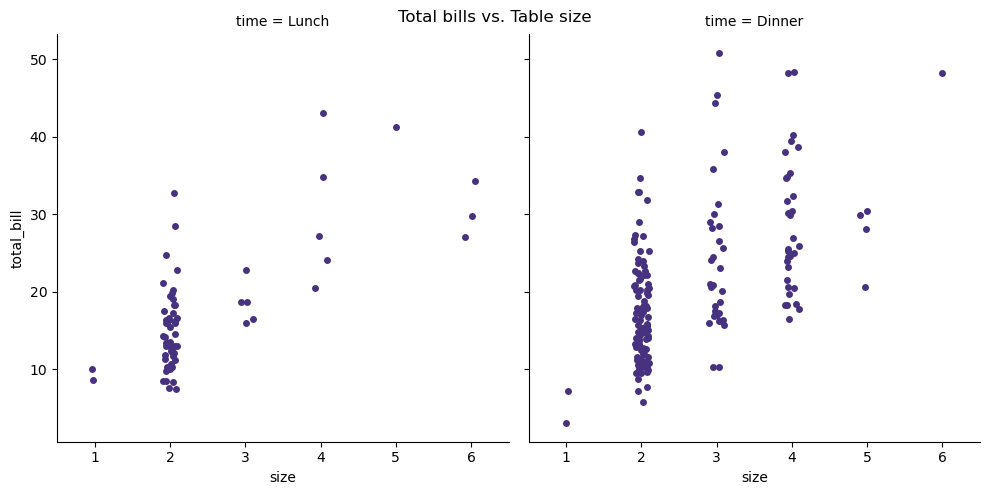

In [22]:
# Solution 2
facetgrid_obj = sns.catplot(data=tips, x='size', y='total_bill', col='time')
facetgrid_obj.fig.suptitle('Total bills vs. Table size')

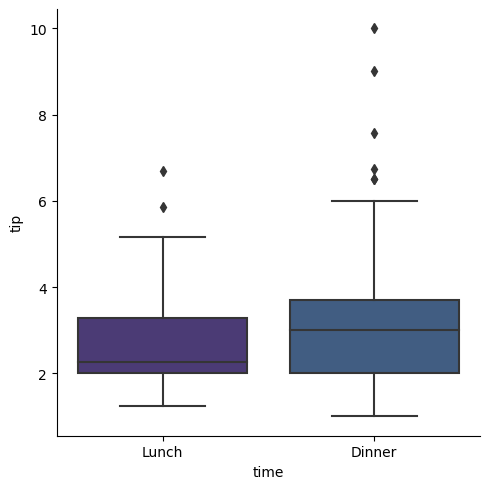

In [23]:
# Solution 3
sns.catplot(x="time", y="tip", kind="box", data=tips)

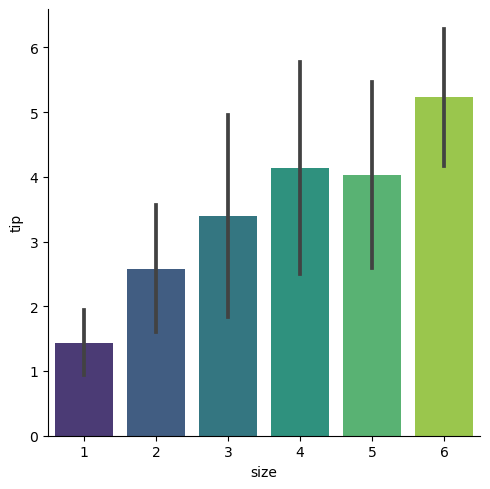

In [24]:
# Solution 4
sns.catplot(x="size", y="tip", kind="bar", data=tips, errorbar='sd')